In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git #descargar retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
Receiving objects: 100% (6205/6205), 13.48 MiB | 28.69 MiB/s, done.
Resolving deltas: 100% (4196/4196), done.


In [3]:
!pip install --upgrade keras # actualizar el keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [4]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=168068 sha256=c9ce67de46c4de237d7b185d7d0d8918c8e0fb5e7e9006599d650e6f7f2401e9
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=0295de13b74d570364e0513c24cbb35d7c6ec139dd13dd2133c04a2bc18b550c
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [5]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
import keras_retinanet
from PIL import Image
from keras.models import load_model


from keras_retinanet import models,  layers
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from tensorflow.keras.applications.resnet50 import  ResNet50

In [7]:
!cp -r "/content/drive/My Drive/DeepMoon/images" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/DeepMoon/Archivos_version_3/annotations.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/DeepMoon/Archivos_version_3/annotations_test.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/DeepMoon/Archivos_version_3/classes.csv" "/content/keras-retinanet"


In [8]:
url_model = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(url_model,'/content/keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5')

('/content/keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5',
 <http.client.HTTPMessage at 0x7f2b81c2a940>)

In [9]:
# lr-patience cada cauntas epocas se reduce
# lr-factor por cuanto se reduce en la epoca de tolerancia (patience)
!keras_retinanet/bin/train.py  \
--lr 0.001 \
--reduce-lr-patience 25 \
--reduce-lr-factor 0.1 \
--freeze-backbone \
--random-transform \
--weights /content/keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5 \
--batch-size 5 \
 --steps 10 \
 --epochs 110 csv annotations.csv classes.csv

2020-11-17 01:22:06.827681: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-11-17 01:22:08.414308: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-17 01:22:08.461741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-17 01:22:08.462406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-11-17 01:22:08.462448: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-17 01:22:08.719302: I 

In [20]:
from keras.models import load_model
from keras_retinanet import models

model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_92.h5


In [143]:
import skimage.io as io

def predict(image):
    image = preprocess_image(image.copy())
    image, scale = resize_image(image)

    boxes, scores, labels = model.predict_on_batch(
     np.expand_dims(image, axis=0)
     )

    boxes /= scale

    return boxes, scores, labels

umbralScore = 0.3
def draw_detections(image, boxes, scores, labels):
      for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < umbralScore:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(image, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(image, b, caption)

In [148]:
image = io.imread('/content/drive/MyDrive/DeepMoon/Imagenes observatorio/DSC_0733.JPG')
image.shape

(4000, 6000, 3)

In [84]:
image = image.copy()
image =  cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
image.shape

(938, 1200, 3)

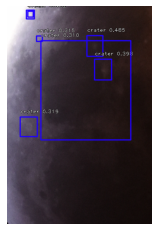

In [149]:



#image = image.reshape(image.shape[0], image.shape[1],1)
#image = cv2.cvtColor(image.copy() , cv2.COLOR_GRAY2RGB)
image = image[1400:2000,2600:3000]


boxes, scores, labels = predict(image)

draw = image.copy()
draw_detections(draw, boxes, scores, labels)

plt.axis('off')
plt.imshow(draw)
plt.show()